In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv('../data/전국_산불현황_정렬_2016_2024.csv', encoding='utf-8')
df

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear
0,3.00,2,4,08:30:00,2016,농산부산물소각,"산7(공),산9-1(국)",천동,단양,단양,충북,1,금요일,4,18:30:00,2016
1,0.01,1,5,09:30:00,2016,입산자실화,산1,덕거,평창,봉평,강원,1,일요일,5,08:35:00,2016
2,0.03,30,4,20:15:00,2016,입산자실화,산71,삼산,강릉,연곡,강원,30,토요일,4,19:05:00,2016
3,0.01,30,4,19:00:00,2016,기타,100-14,NaN,관악,남현,서울,30,토요일,4,16:50:00,2016
4,0.10,29,4,14:40:00,2016,쓰레기소각,산20-4,NaN,시흥,무지내,경기,29,금요일,4,13:50:00,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,0.15,1,4,17:53:00,2024,기타,산64,도화,예천,지보,경북,1,월요일,4,16:15:00,2024
4716,0.99,1,6,18:35:00,2024,건축물화재비화,산35-1,축현,파주,탄현,경기,1,토요일,6,15:22:00,2024
4717,0.05,2,6,15:20:00,2024,기타,506-2,과천,과천,NaN,경기,2,일요일,6,09:07:00,2024
4718,0.02,13,4,01:59:00,2024,기타,산70,감천,사하,NaN,부산,13,토요일,4,00:20:00,2024


In [15]:
# 결측치 비율 확인
missing_ratio = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_ratio)

# 기본 통계 (수치형 / 범주형)
print(df.describe())
print(df.describe(include='object'))

locmenu           10.677966
locdong            8.177966
locgungu           0.381356
damagearea         0.000000
endday             0.000000
endmonth           0.000000
endtime            0.000000
endyear            0.000000
firecause          0.000000
locbunji           0.000000
locsi              0.000000
startday           0.000000
startdayofweek     0.000000
startmonth         0.000000
starttime          0.000000
startyear          0.000000
dtype: float64
         damagearea       endday     endmonth      endyear     startday  \
count   4720.000000  4720.000000  4720.000000  4720.000000  4720.000000   
mean       7.382934    15.303178     4.396186  2019.800636    15.307839   
std      248.916538     8.883689     2.937836     2.371128     8.897639   
min        0.010000     1.000000     1.000000  2016.000000     1.000000   
25%        0.020000     7.000000     3.000000  2018.000000     8.000000   
50%        0.090000    15.000000     4.000000  2020.000000    15.000000   
75%        0

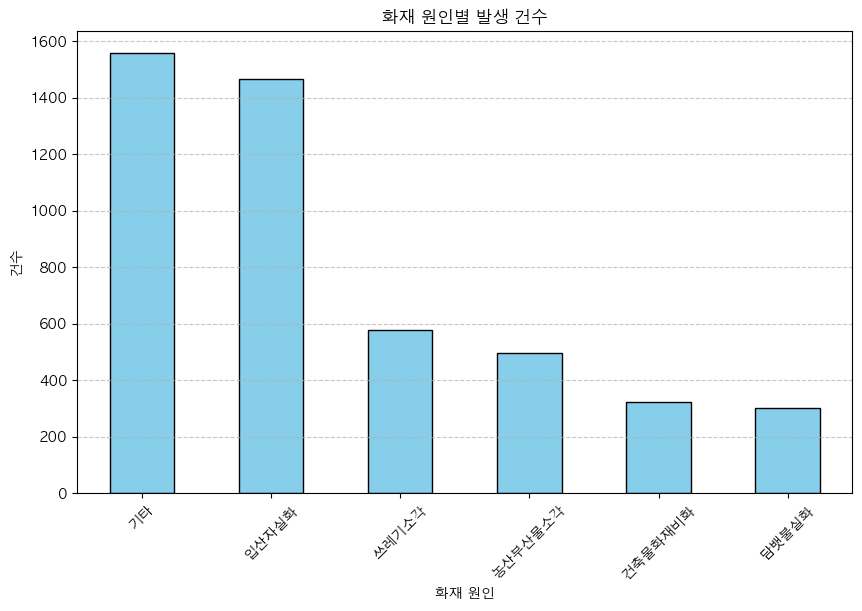

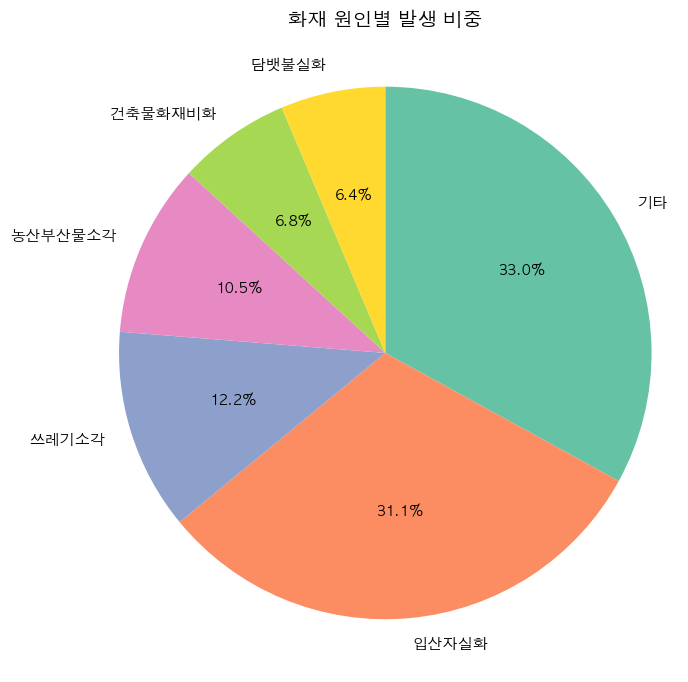

표본 수(n): 4720


In [50]:
import matplotlib.pyplot as plt
from matplotlib import rc

# Mac 한글 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

firecause_counts = df['firecause'].value_counts()

plt.figure(figsize=(10, 6))
firecause_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('화재 원인별 발생 건수')
plt.xlabel('화재 원인')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 1) 원인별 집계 (결측은 '미상' 처리)
counts = df['firecause'].fillna('미상').value_counts()
total = counts.sum()

# 2) 작은 비중(<2%)은 '기타'로 묶기
ratio = counts / total
major = counts[ratio >= 0.02]
minor_sum = counts[ratio < 0.02].sum()
if minor_sum > 0:
    counts_plot = major.copy()
    counts_plot['기타'] = minor_sum
else:
    counts_plot = counts

# 3) 파이차트 색상 (파스텔 & 대비색 조합)
custom_colors = [
    '#66c2a5',  # 청록
    '#fc8d62',  # 주황
    '#8da0cb',  # 블루톤
    '#e78ac3',  # 핑크
    '#a6d854',  # 연두
    '#ffd92f',  # 노랑
    '#e5c494',  # 베이지
    '#b3b3b3'   # 회색
]

# 4) autopct 커스터마이즈 (3% 미만 라벨 숨기기)
def autopct_pct(p):
    return f'{p:.1f}%' if p >= 3 else ''

# 5) 시각화
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    counts_plot.values,
    labels=counts_plot.index,
    autopct=autopct_pct,
    startangle=90,
    counterclock=False,
    colors=custom_colors[:len(counts_plot)]
)

# 라벨/퍼센트 스타일
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')

ax.set_title('화재 원인별 발생 비중', fontsize=14)
ax.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()

print(f'표본 수(n): {total}')

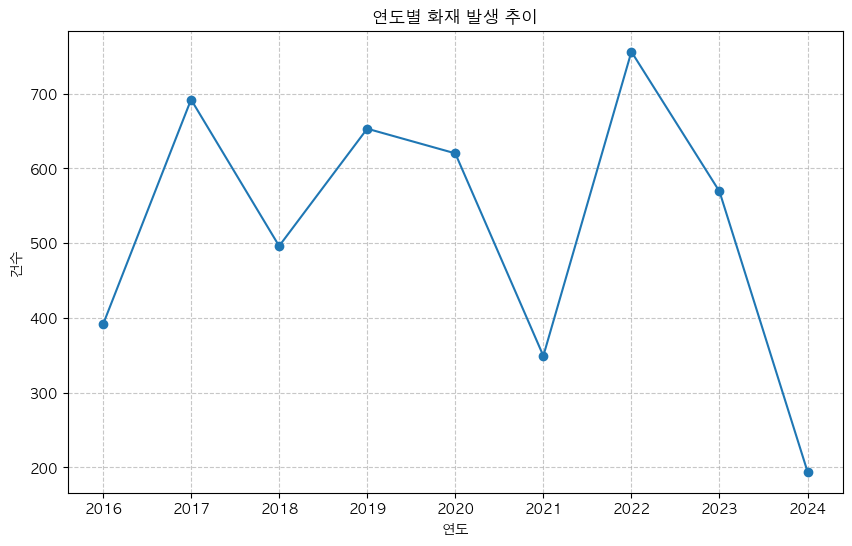

In [17]:
year_counts = df['startyear'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='line', marker='o')
plt.title('연도별 화재 발생 추이')
plt.xlabel('연도')
plt.ylabel('건수')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

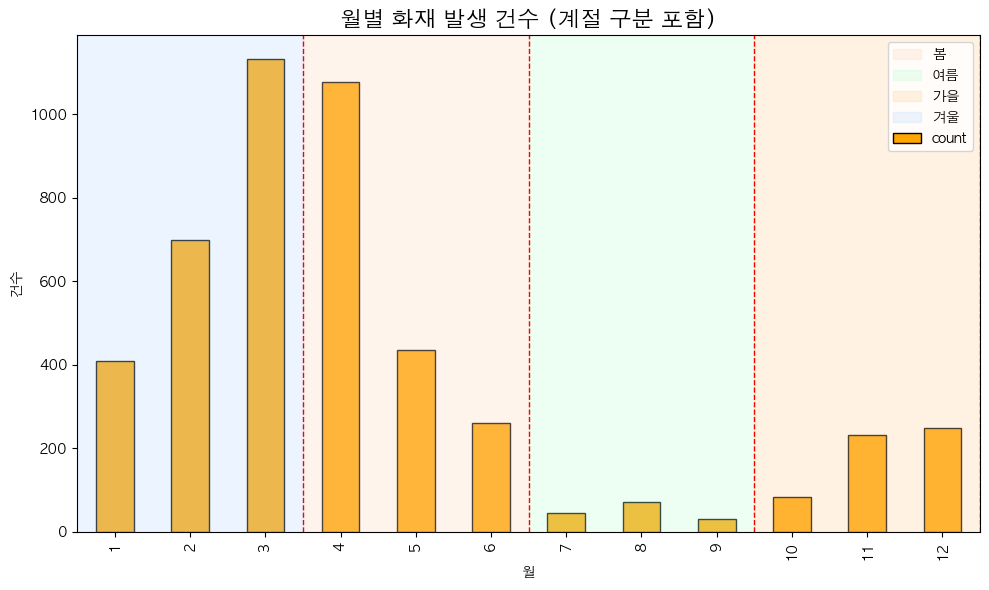

In [46]:
# 월별 건수 (0~11 index 순서)
month_counts = df['startmonth'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
month_counts.plot(kind='bar', color='orange', edgecolor='black', ax=ax)

# 계절 배경색 (봄:3~5, 여름:6~8, 가을:9~11, 겨울:12~2)
# x축 index 기준이므로 -0.5 보정
season_colors = {
    '봄':  {'range': (2.5, 5.5),  'color': '#FFDDC1'},  # 연한 주황
    '여름': {'range': (5.5, 8.5),  'color': '#C1FFD7'},  # 연한 초록
    '가을': {'range': (8.5, 11.5), 'color': '#FFD6A5'},  # 연한 노랑/주황
    '겨울': {'range': (-0.5, 2.5), 'color': '#C1E1FF'}   # 연한 파랑
}

for season, info in season_colors.items():
    ax.axvspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=season)

# 계절 경계선
season_boundaries = [3, 6, 9, 12]
for m in season_boundaries:
    ax.axvline(x=m-0.5, color='red', linestyle='--', linewidth=1)

# 제목/라벨
ax.set_title('월별 화재 발생 건수 (계절 구분 포함)', fontsize=16)
ax.set_xlabel('월')
ax.set_ylabel('건수')
ax.set_xticks(range(len(month_counts)))
ax.set_xticklabels(month_counts.index)
ax.legend()
plt.tight_layout()
plt.show()

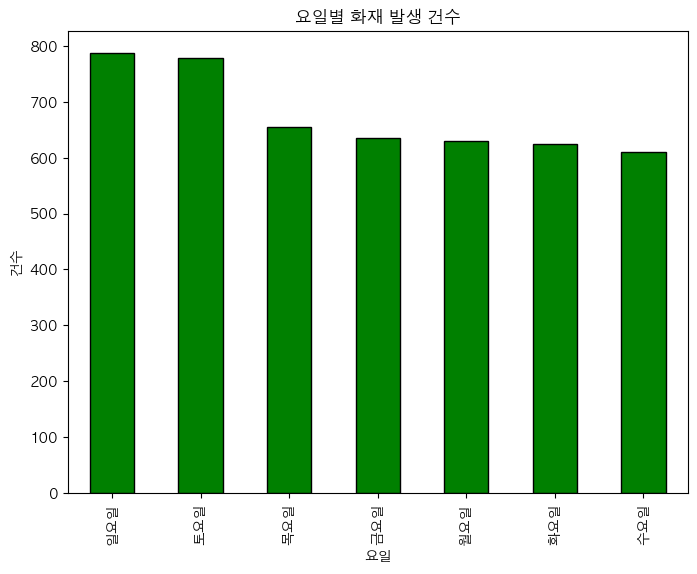

In [19]:
day_counts = df['startdayofweek'].value_counts()

plt.figure(figsize=(8, 6))
day_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('요일별 화재 발생 건수')
plt.xlabel('요일')
plt.ylabel('건수')
plt.show()

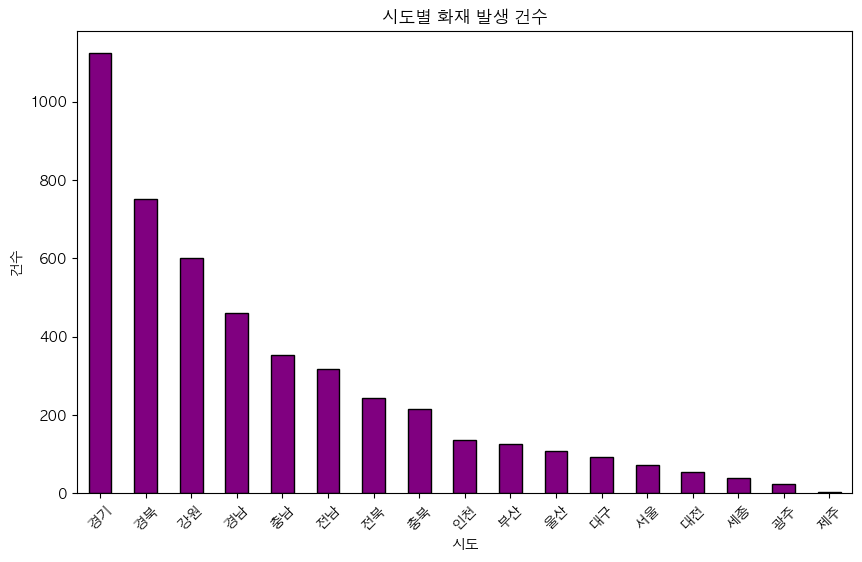

In [21]:
region_counts = df['locsi'].value_counts()

plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('시도별 화재 발생 건수')
plt.xlabel('시도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.show()

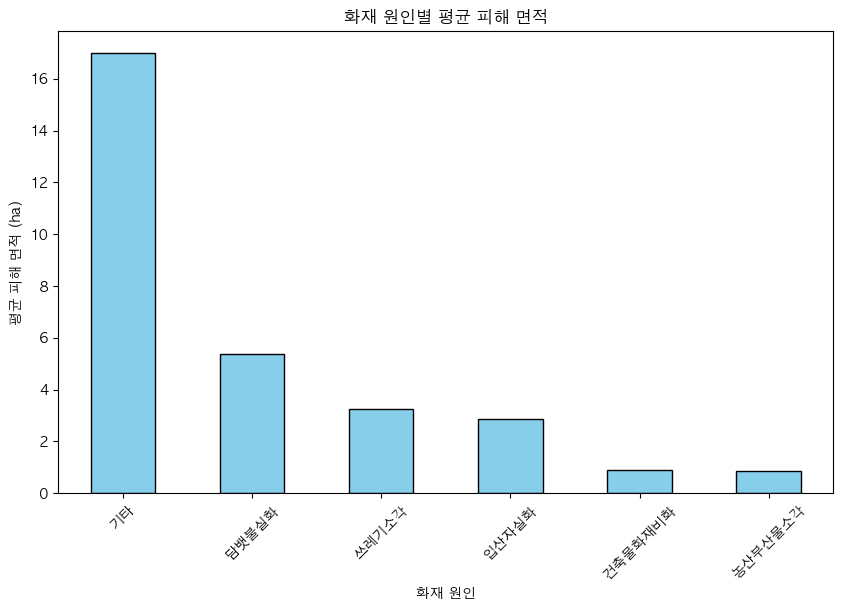

In [22]:
cause_damage = df.groupby('firecause')['damagearea'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cause_damage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('화재 원인별 평균 피해 면적')
plt.xlabel('화재 원인')
plt.ylabel('평균 피해 면적 (ha)')
plt.xticks(rotation=45)
plt.show()

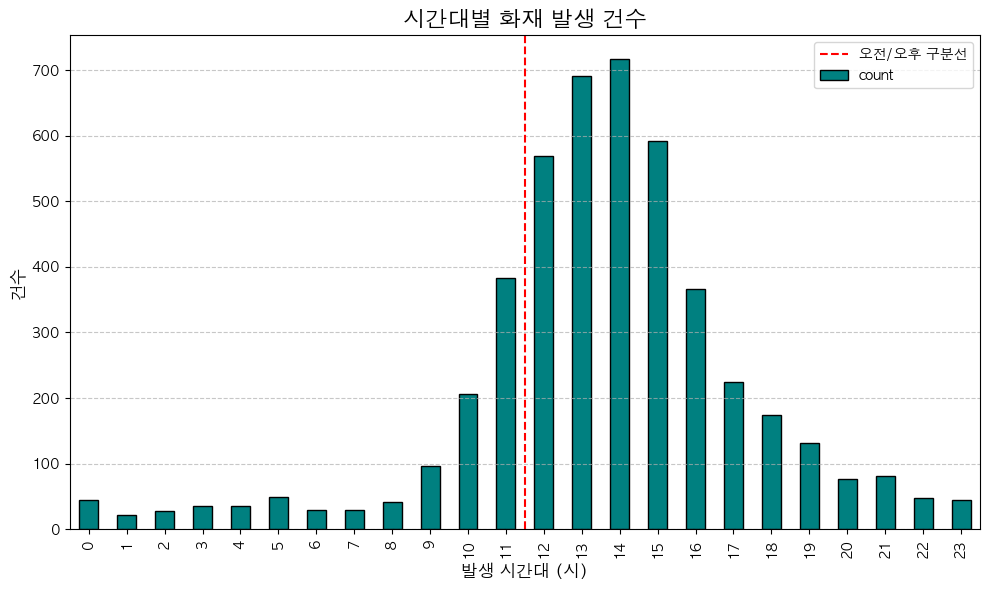

In [43]:
# 시간대 추출
df['start_hour'] = pd.to_datetime(df['starttime'], format='%H:%M:%S', errors='coerce').dt.hour

# 시간대별 발생 건수 (0~23 순으로 정렬)
hour_counts = df['start_hour'].value_counts().reindex(range(24), fill_value=0)

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
hour_counts.plot(kind='bar', color='teal', edgecolor='black', ax=ax)

# 기준선 (12시)
ax.axvline(x=11.5, color='red', linestyle='--', linewidth=1.5, label='오전/오후 구분선')

ax.set_title('시간대별 화재 발생 건수', fontsize=16)
ax.set_xlabel('발생 시간대 (시)', fontsize=12)
ax.set_ylabel('건수', fontsize=12)
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/mc/c2xlw1v55mvcpklv1sgzmldc0000gn/T/ipykernel_86973/1058006286.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_medians = df_filtered.groupby('size_quartile')['duration_hours'].median()


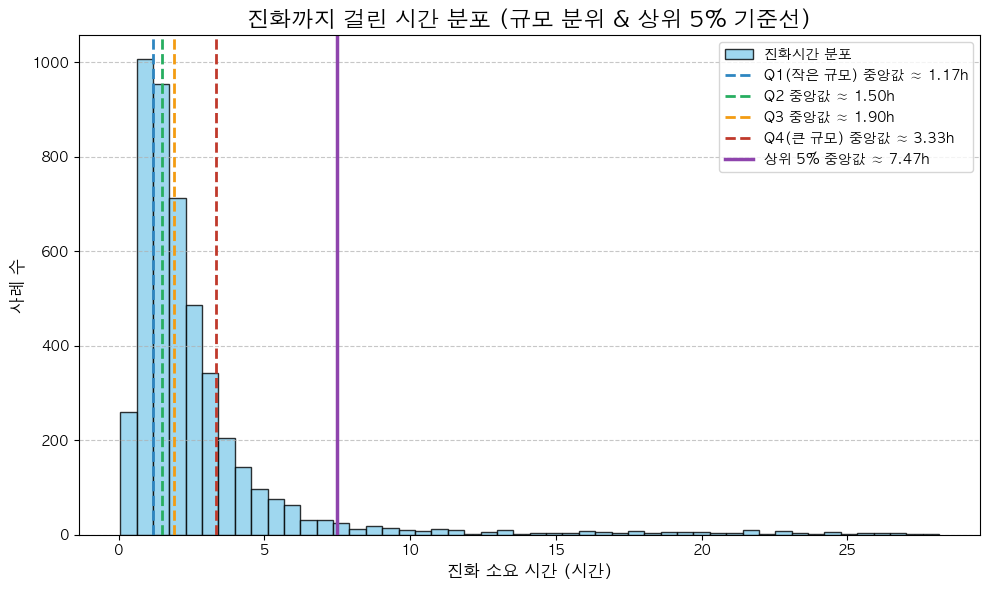

전체 평균 진화 소요 시간: 2.73 시간
전체 중앙값 진화 소요 시간: 1.81 시간

피해면적 사분위 경계(ha):
Q25: 0.0200
Q50: 0.0800
Q75: 0.2600

상위 5% 기준 피해면적: 1.5000 ha
상위 5% 중앙값 진화 소요 시간: 7.47 시간


In [48]:
# --- 기존 전처리 ------------------------------------------------------------
df['start_datetime'] = pd.to_datetime(
    df[['startyear', 'startmonth', 'startday']].astype(str).agg('-'.join, axis=1) + ' ' + df['starttime'],
    errors='coerce'
)
df['end_datetime'] = pd.to_datetime(
    df[['endyear', 'endmonth', 'endday']].astype(str).agg('-'.join, axis=1) + ' ' + df['endtime'],
    errors='coerce'
)
df['duration_hours'] = (df['end_datetime'] - df['start_datetime']).dt.total_seconds() / 3600

# 이상치 제거
df_filtered = df[(df['duration_hours'] >= 0) & 
                 (df['duration_hours'] <= df['duration_hours'].quantile(0.99))].copy()

# 피해면적 결측 제거
df_filtered = df_filtered[df_filtered['damagearea'].notna()].copy()

# --- 사분위 & 상위 5% 그룹 분류 -----------------------------------------------
# 사분위 경계 계산
q_edges = df_filtered['damagearea'].quantile([0.25, 0.5, 0.75]).to_dict()

# 사분위 라벨링
df_filtered['size_quartile'] = pd.qcut(
    df_filtered['damagearea'],
    q=4,
    labels=['Q1(작은 규모)', 'Q2', 'Q3', 'Q4(큰 규모)']
)

# 상위 5% 기준값
top5_threshold = df_filtered['damagearea'].quantile(0.95)
df_filtered['is_top5'] = df_filtered['damagearea'] >= top5_threshold

# 중앙값 계산 (사분위)
quartile_medians = df_filtered.groupby('size_quartile')['duration_hours'].median()

# 상위 5% 중앙값
top5_median = df_filtered[df_filtered['is_top5']]['duration_hours'].median()

# --- 시각화 -------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['duration_hours'], bins=50, color='skyblue', edgecolor='black', alpha=0.8, label='진화시간 분포')

# 분위별 중앙값 기준선
colors = {
    'Q1(작은 규모)': '#2E86C1',
    'Q2': '#27AE60',
    'Q3': '#F39C12',
    'Q4(큰 규모)': '#C0392B'
}

for quartile, med in quartile_medians.items():
    plt.axvline(med, color=colors[str(quartile)], linestyle='--', linewidth=2,
                label=f'{quartile} 중앙값 ≈ {med:.2f}h')

# 상위 5% 중앙값 기준선 (굵은 보라색)
plt.axvline(top5_median, color='#8E44AD', linestyle='-', linewidth=2.5,
            label=f'상위 5% 중앙값 ≈ {top5_median:.2f}h')

plt.title('진화까지 걸린 시간 분포 (규모 분위 & 상위 5% 기준선)', fontsize=16)
plt.xlabel('진화 소요 시간 (시간)', fontsize=12)
plt.ylabel('사례 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# --- 출력 ---------------------------------------------------------------------
print("전체 평균 진화 소요 시간:", round(df_filtered['duration_hours'].mean(), 2), "시간")
print("전체 중앙값 진화 소요 시간:", round(df_filtered['duration_hours'].median(), 2), "시간")

print("\n피해면적 사분위 경계(ha):")
for p, v in q_edges.items():
    print(f"Q{int(p*100)}: {v:.4f}")

print(f"\n상위 5% 기준 피해면적: {top5_threshold:.4f} ha")
print(f"상위 5% 중앙값 진화 소요 시간: {top5_median:.2f} 시간")

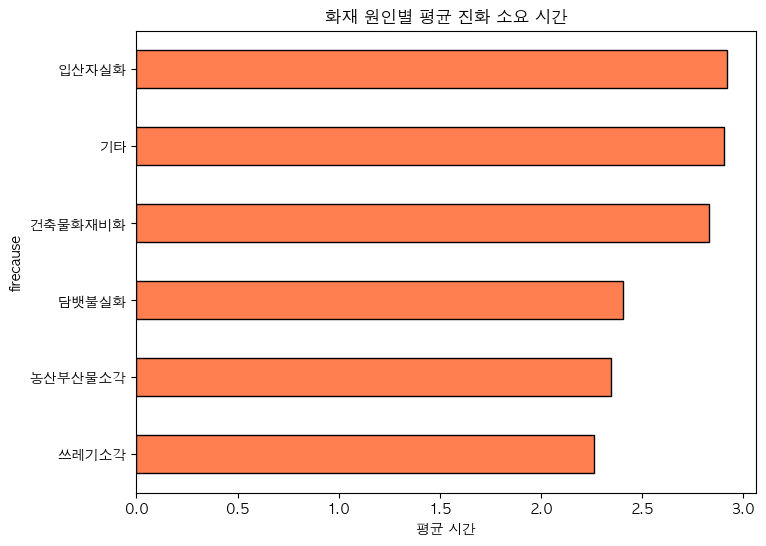

In [25]:
cause_duration = df_filtered.groupby('firecause')['duration_hours'].mean().sort_values()
cause_duration.plot(kind='barh', figsize=(8,6), color='coral', edgecolor='black')
plt.title('화재 원인별 평균 진화 소요 시간')
plt.xlabel('평균 시간')
plt.show()

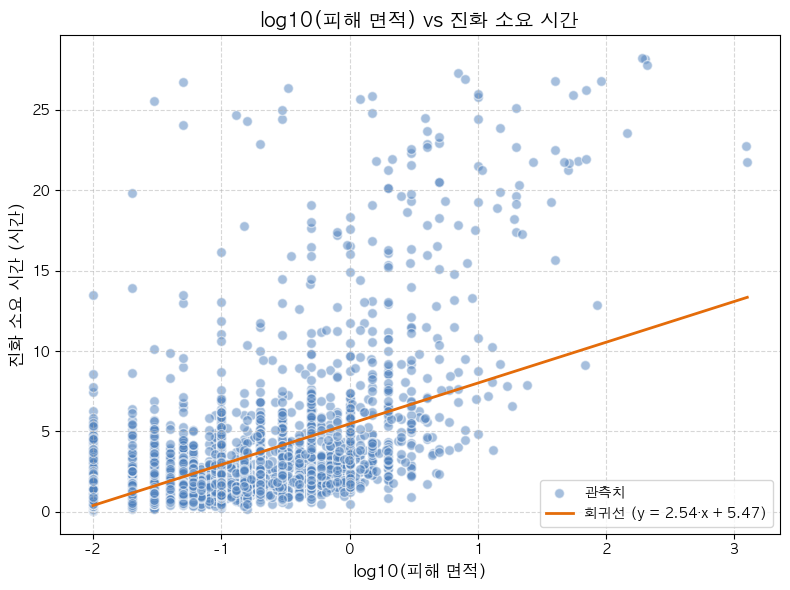

In [38]:
# 데이터 준비
df_log = df_filtered[df_filtered['damagearea'] > 0][['damagearea', 'duration_hours']].dropna()
x_log = np.log10(df_log['damagearea'].values)
y = df_log['duration_hours'].values

# 회귀
m, b = np.polyfit(x_log, y, 1)
x_line = np.linspace(x_log.min(), x_log.max(), 200)
y_pred = m * x_line + b

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(x_log, y, alpha=0.5, color='#4F81BD', edgecolor='white', s=50, label='관측치')  # 파스텔 블루
plt.plot(x_line, y_pred, linewidth=2, color='#E46C0A', label=f'회귀선 (y = {m:.2f}·x + {b:.2f})')  # 주황색

plt.title('log10(피해 면적) vs 진화 소요 시간', fontsize=14, fontweight='bold')
plt.xlabel('log10(피해 면적)', fontsize=12)
plt.ylabel('진화 소요 시간 (시간)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

In [54]:
!pip install geopandas folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [folium]


In [56]:
import os
import json
import pandas as pd
import geopandas as gpd
import folium
from matplotlib import rc

# (Mac) 한글/마이너스
rc('font', family='AppleGothic')

# ===== 0) 경로/URL 설정 =====
# 원한다면 다른 GeoJSON으로 바꿔도 됩니다.
GEOJSON_PATH = "KOR_sido.geojson"
GEOJSON_URL  = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo.json"

# ===== 1) GeoJSON 준비: 없으면 다운로드 =====
if not os.path.exists(GEOJSON_PATH):
    try:
        import requests
        resp = requests.get(GEOJSON_URL, timeout=30)
        resp.raise_for_status()
        with open(GEOJSON_PATH, "wb") as f:
            f.write(resp.content)
        print(f"[다운로드 완료] {GEOJSON_PATH}")
    except Exception as e:
        raise FileNotFoundError(
            f"{GEOJSON_PATH} 파일이 없습니다. 인터넷이 막혀 있다면, "
            f"브라우저로 내려받아 작업 폴더에 저장하세요.\nURL: {GEOJSON_URL}\n원인: {e}"
        )

# ===== 2) 시도명 표준화 (df.locsi → 표준 시도명) =====
sido_map = {
    '서울': '서울특별시','부산': '부산광역시','대구': '대구광역시','인천': '인천광역시',
    '광주': '광주광역시','대전': '대전광역시','울산': '울산광역시','세종': '세종특별자치시',
    '경기': '경기도','강원': '강원특별자치도','충북': '충청북도','충남': '충청남도',
    '전북': '전라북도','전남': '전라남도','경북': '경상북도','경남': '경상남도',
    '제주': '제주특별자치도'
}
df['sido_std'] = df['locsi'].map(sido_map).fillna(df['locsi'])

# ===== 3) 시도별 평균 피해 면적 집계 =====
agg = (
    df.dropna(subset=['damagearea'])
      .groupby('sido_std', as_index=False, observed=True)  # FutureWarning 방지
      .agg(평균피해면적=('damagearea','mean'), 건수=('damagearea','size'))
)

# ===== 4) GeoJSON 로드 & 시도명 컬럼 식별/정규화 =====
gdf = gpd.read_file(GEOJSON_PATH)

# 흔한 컬럼 후보들 중 하나를 'sido_name'으로 사용
name_candidates = ['name', 'CTP_KOR_NM', 'SIDO_KOR_NM', 'SIG_KOR_NM', 'ADM_DR_NM', 'adm_nm']
for c in name_candidates:
    if c in gdf.columns:
        gdf = gdf.rename(columns={c: 'sido_name'})
        break
if 'sido_name' not in gdf.columns:
    raise ValueError("GeoJSON의 시도명 컬럼을 찾지 못했습니다. 파일의 시도명 컬럼명을 확인해 'sido_name'으로 바꿔주세요.")

# GeoJSON 쪽 시도명도 최신 명칭으로 정규화(강원도 → 강원특별자치도 등)
replace_to_new = {
    '강원도': '강원특별자치도',
    '제주특별자치도': '제주특별자치도',  # 유지
}
gdf['sido_name'] = gdf['sido_name'].replace(replace_to_new)

# 혹시 반대로 최신→구명칭이 필요한 GeoJSON이면 아래 사용:
# replace_to_old = {'강원특별자치도':'강원도'}
# gdf['sido_name'] = gdf['sido_name'].replace(replace_to_old)

# ===== 5) 조인 & Folium Choropleth =====
m = folium.Map(location=[36.5, 127.8], zoom_start=7, tiles='cartodbpositron')

# Choropleth
folium.Choropleth(
    geo_data=gdf.to_json(),
    data=agg,
    columns=['sido_std', '평균피해면적'],
    key_on='feature.properties.sido_name',
    fill_color='YlOrRd',
    fill_opacity=0.85,
    line_opacity=0.4,
    nan_fill_color='lightgray',
    legend_name='시도별 평균 피해 면적(ha)'
).add_to(m)

# Tooltip: 시도명/평균/건수
gdf_merge = gdf.merge(agg, left_on='sido_name', right_on='sido_std', how='left')
folium.GeoJson(
    gdf_merge.to_json(),
    name='시도 경계',
    style_function=lambda x: {'color':'black','weight':0.6,'fillOpacity':0},
    tooltip=folium.features.GeoJsonTooltip(
        fields=['sido_name', '평균피해면적', '건수'],
        aliases=['시도', '평균 피해면적(ha)', '건수'],
        localize=True
    )
).add_to(m)

m.save('시도별_평균_피해면적_지도.html')
print("완료: '시도별_평균_피해면적_지도.html' 이 생성되었습니다.")

[다운로드 완료] KOR_sido.geojson
완료: '시도별_평균_피해면적_지도.html' 이 생성되었습니다.


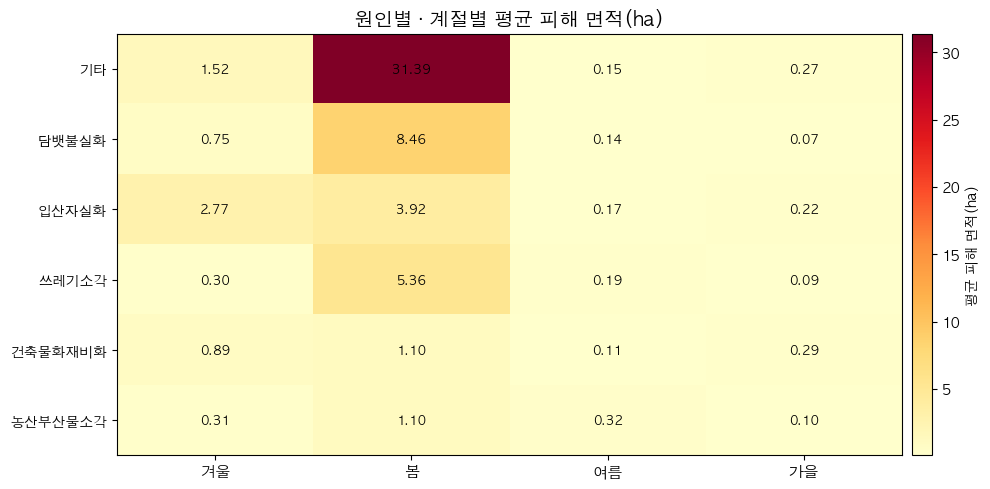

In [60]:
# 1) 계절 컬럼 만들기
def month_to_season(m):
    if m in [12, 1, 2]:  return '겨울'
    if m in [3, 4, 5]:   return '봄'
    if m in [6, 7, 8]:   return '여름'
    if m in [9, 10, 11]: return '가을'
    return np.nan

df['season'] = df['startmonth'].apply(month_to_season)
season_order = ['겨울', '봄', '여름', '가을']

# 2) 결측·이상치 간단 정리(선택)
df_use = df.dropna(subset=['damagearea', 'firecause', 'season']).copy()

# 3) 원인별·계절별 평균 피해 면적 피벗
pivot = pd.pivot_table(
    df_use, values='damagearea',
    index='firecause', columns='season',
    aggfunc='mean'
).reindex(columns=season_order)

# 보기 좋게 정렬(전체 평균 큰 원인 순)
pivot = pivot.loc[pivot.mean(axis=1).sort_values(ascending=False).index]

# 4) 히트맵 (matplotlib만 사용)
fig, ax = plt.subplots(figsize=(10, max(5, 0.35*len(pivot))))
im = ax.imshow(pivot.values, aspect='auto', cmap='YlOrRd')

# 축 라벨
ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, fontsize=11)
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index, fontsize=10)

# 값 주석(소수 2자리)
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        val = pivot.values[i, j]
        if pd.notna(val):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=9)

# 컬러바(폭 작게)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('평균 피해 면적(ha)', fontsize=10)

ax.set_title('원인별 · 계절별 평균 피해 면적(ha)', fontsize=14)
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('../data/강원도_2016-2022.csv', encoding='utf-8')

# 날짜/시간 관련 컬럼을 datetime 형식으로 변환
df['OCRN_YMD'] = pd.to_datetime(df['OCRN_YMD'], format='%Y%m%d')
df['FIRE_OCRN_HR'] = pd.to_datetime(df['FIRE_OCRN_HR'], format='%H%M%S')


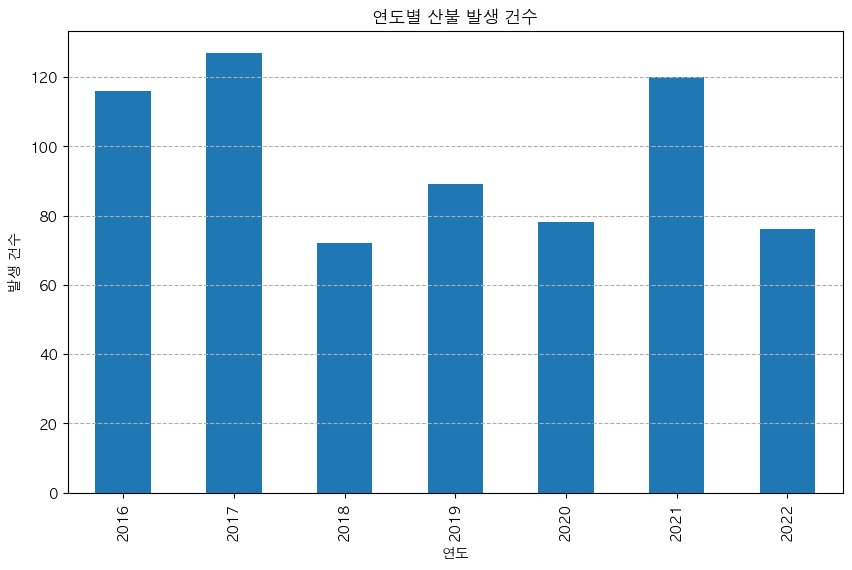

In [32]:
import matplotlib.pyplot as plt
from matplotlib import rc

# Mac 한글 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
df['OCRN_YMD'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('연도별 산불 발생 건수')
plt.xlabel('연도')
plt.ylabel('발생 건수')
plt.grid(axis='y', linestyle='--')
plt.show()

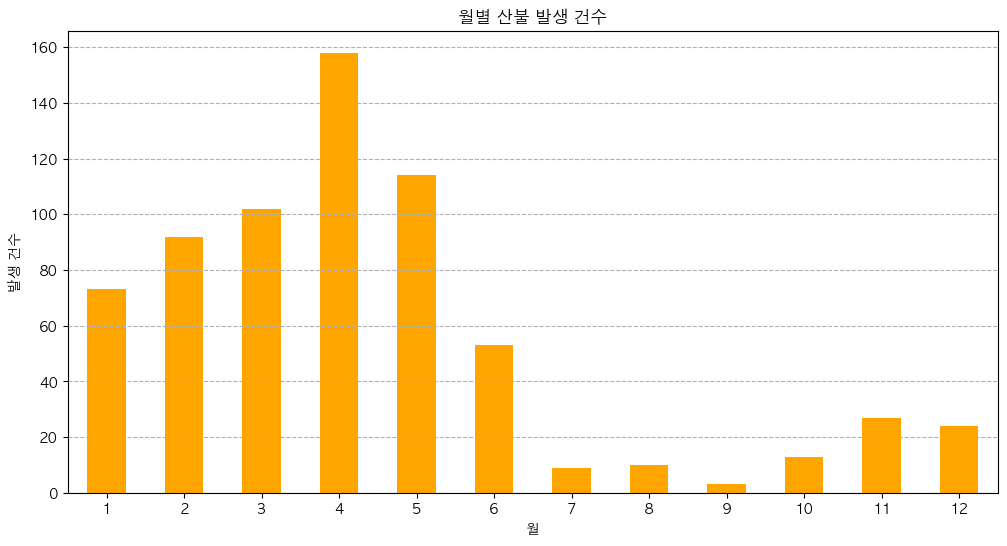

In [33]:
plt.figure(figsize=(12, 6))
df['OCRN_YMD'].dt.month.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('월별 산불 발생 건수')
plt.xlabel('월')
plt.ylabel('발생 건수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

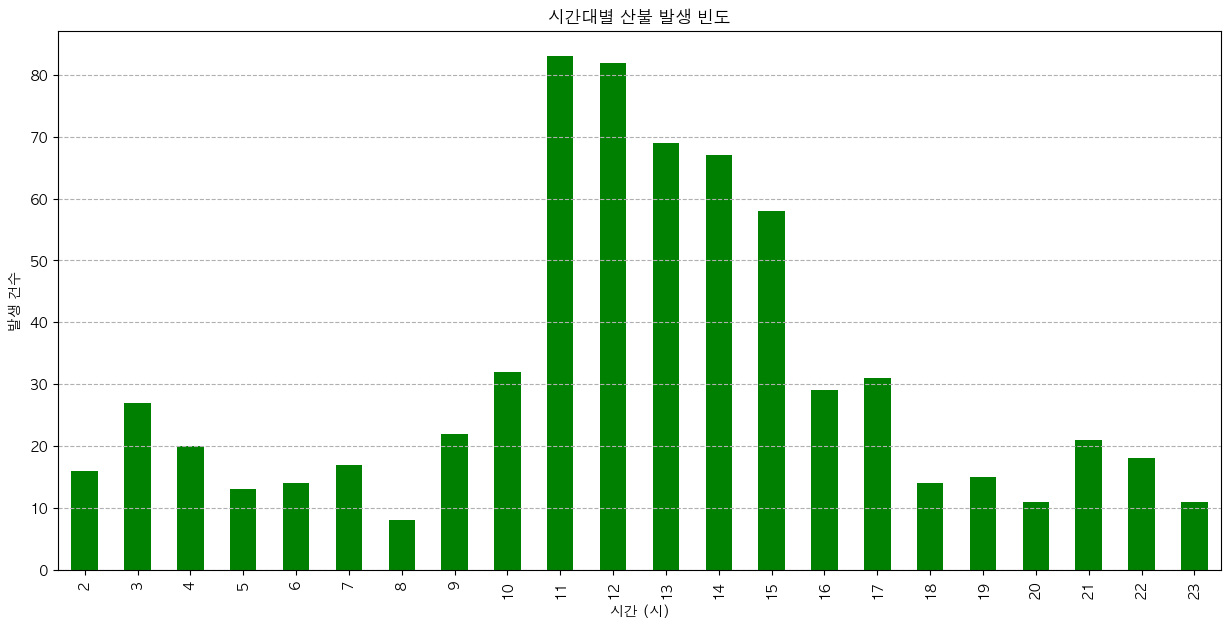

In [34]:
plt.figure(figsize=(15, 7))
df['FIRE_OCRN_HR'].dt.hour.value_counts().sort_index().plot(kind='bar', color='green')
plt.title('시간대별 산불 발생 빈도')
plt.xlabel('시간 (시)')
plt.ylabel('발생 건수')
plt.grid(axis='y', linestyle='--')
plt.show()

/var/folders/mc/c2xlw1v55mvcpklv1sgzmldc0000gn/T/ipykernel_3546/828750750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_counts.values, y=cause_counts.index, palette='viridis')


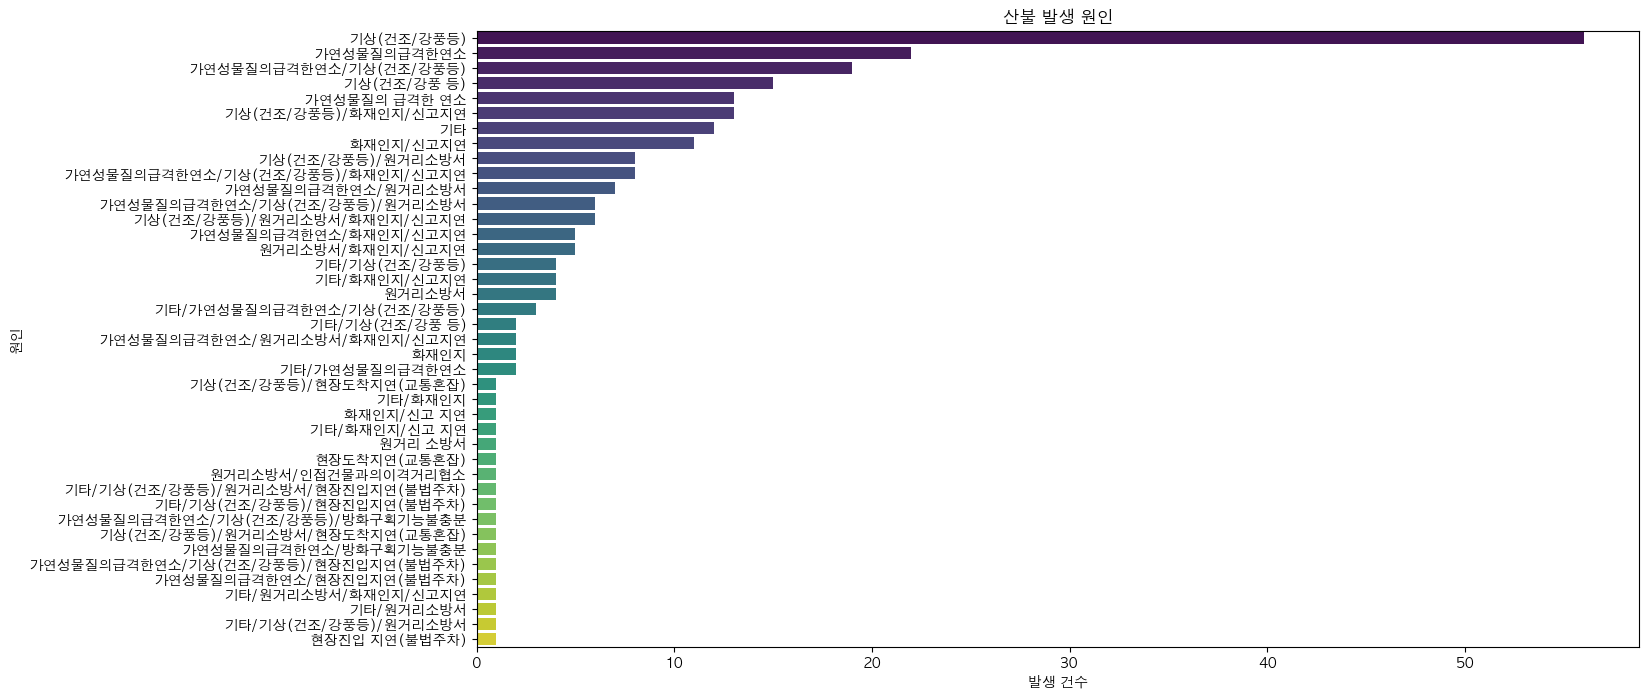

In [35]:
plt.figure(figsize=(15, 8))
cause_counts = df['OCRN_CS_NM'].value_counts()
sns.barplot(x=cause_counts.values, y=cause_counts.index, palette='viridis')
plt.title('산불 발생 원인')
plt.xlabel('발생 건수')
plt.ylabel('원인')
plt.show()

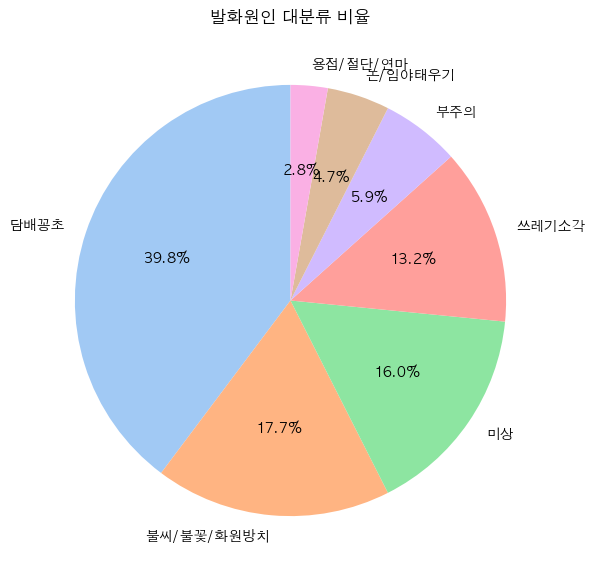

/var/folders/mc/c2xlw1v55mvcpklv1sgzmldc0000gn/T/ipykernel_3546/1666828918.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_causes.values, y=top_10_causes.index, palette='rocket')


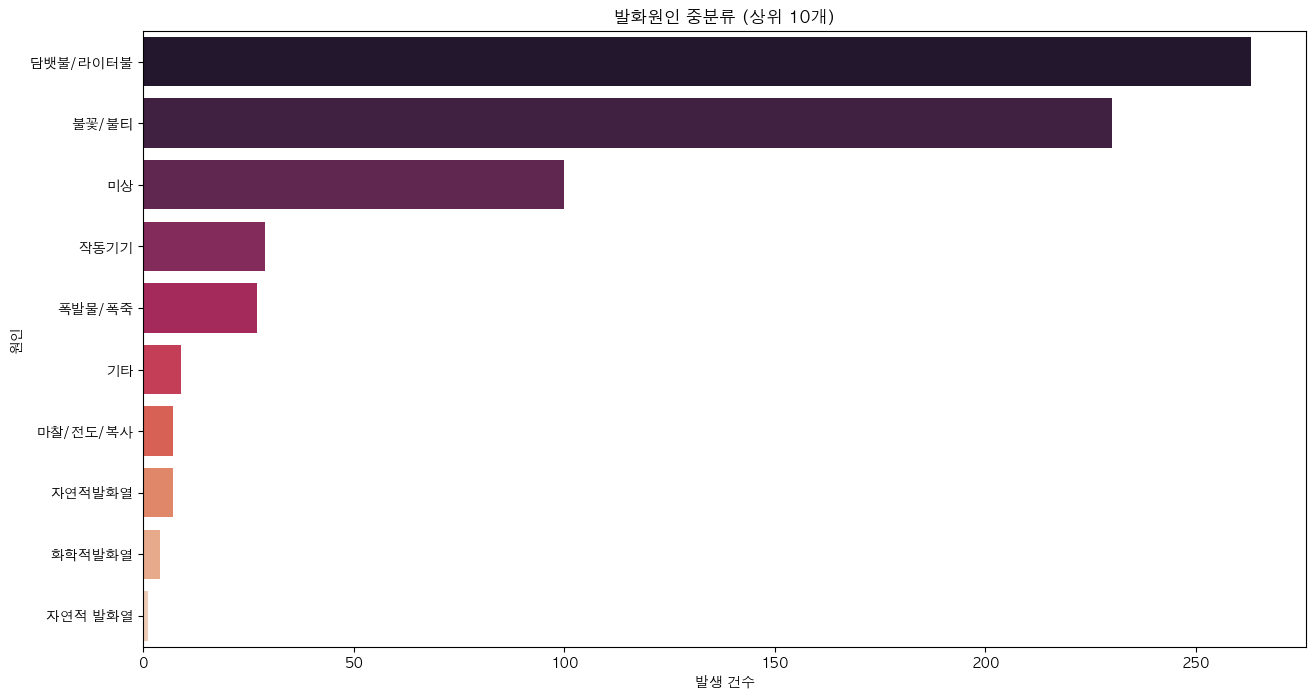

In [40]:
# 대분류
plt.figure(figsize=(12, 7))
df['IGTN_HTSRC_SCLSF_NM'].value_counts().head(7).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('발화원인 대분류 비율')
plt.ylabel('')
plt.show()

# 중분류 (상위 10개)
plt.figure(figsize=(15, 8))
top_10_causes = df['IGTN_HTSRC_LCLSF_NM'].value_counts().head(10)
sns.barplot(x=top_10_causes.values, y=top_10_causes.index, palette='rocket')
plt.title('발화원인 중분류 (상위 10개)')
plt.xlabel('발생 건수')
plt.ylabel('원인')
plt.show()

/var/folders/mc/c2xlw1v55mvcpklv1sgzmldc0000gn/T/ipykernel_3546/2721921216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sgg_counts.values, y=sgg_counts.index, palette='cubehelix')


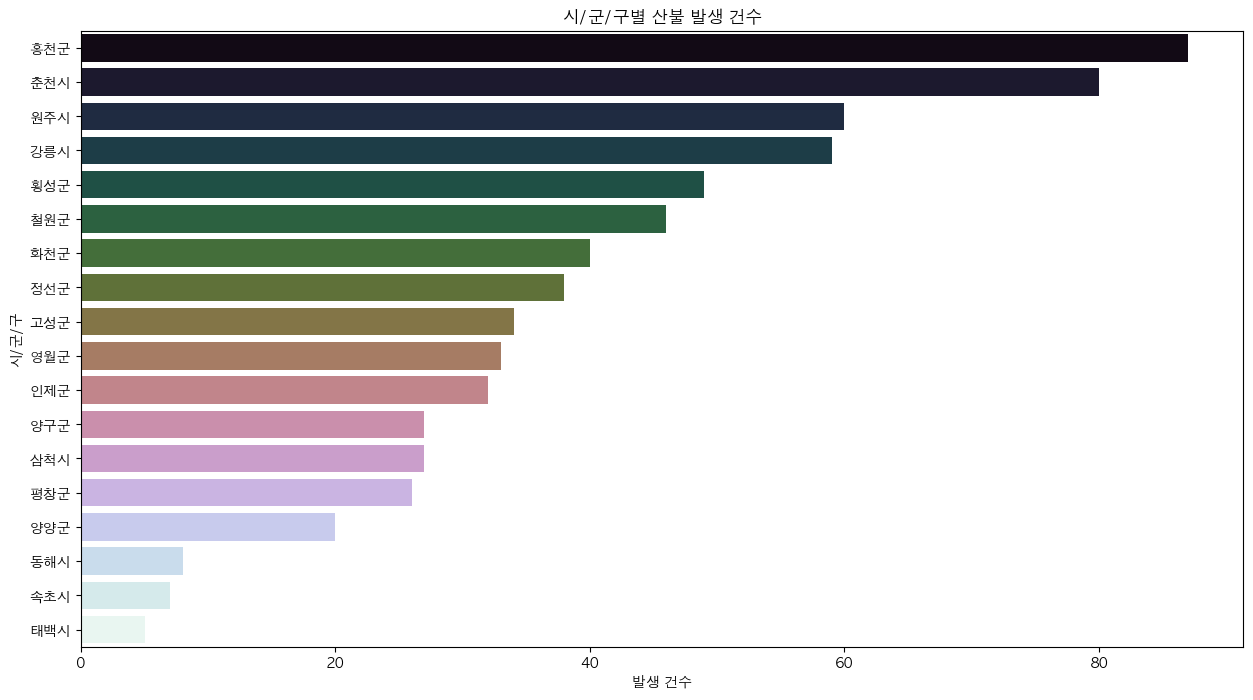

In [41]:
plt.figure(figsize=(15, 8))
sgg_counts = df['GRNDS_SGG_NM'].value_counts()
sns.barplot(x=sgg_counts.values, y=sgg_counts.index, palette='cubehelix')
plt.title('시/군/구별 산불 발생 건수')
plt.xlabel('발생 건수')
plt.ylabel('시/군/구')
plt.show()

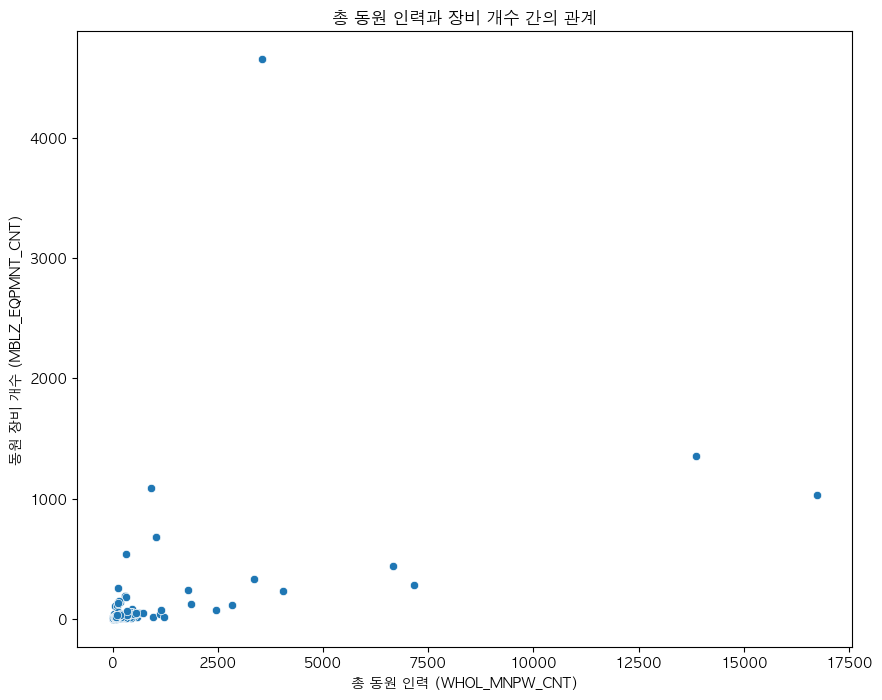

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='WHOL_MNPW_CNT', y='MBLZ_EQPMNT_CNT', data=df)
plt.title('총 동원 인력과 장비 개수 간의 관계')
plt.xlabel('총 동원 인력 (WHOL_MNPW_CNT)')
plt.ylabel('동원 장비 개수 (MBLZ_EQPMNT_CNT)')
plt.show()

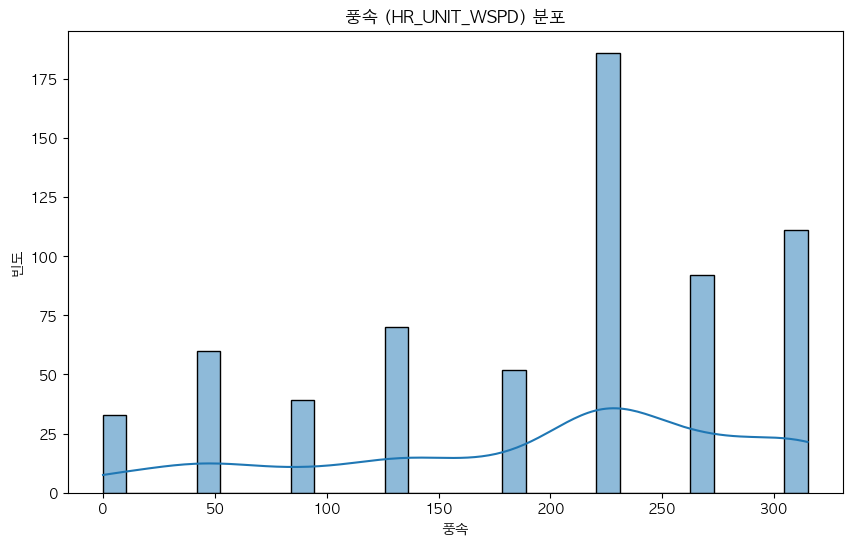

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['HR_UNIT_WSPD'], bins=30, kde=True)
plt.title('풍속 (HR_UNIT_WSPD) 분포')
plt.xlabel('풍속')
plt.ylabel('빈도')
plt.show()

/var/folders/mc/c2xlw1v55mvcpklv1sgzmldc0000gn/T/ipykernel_3546/759194607.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_weather.index, y=top_10_weather.values, palette='coolwarm')


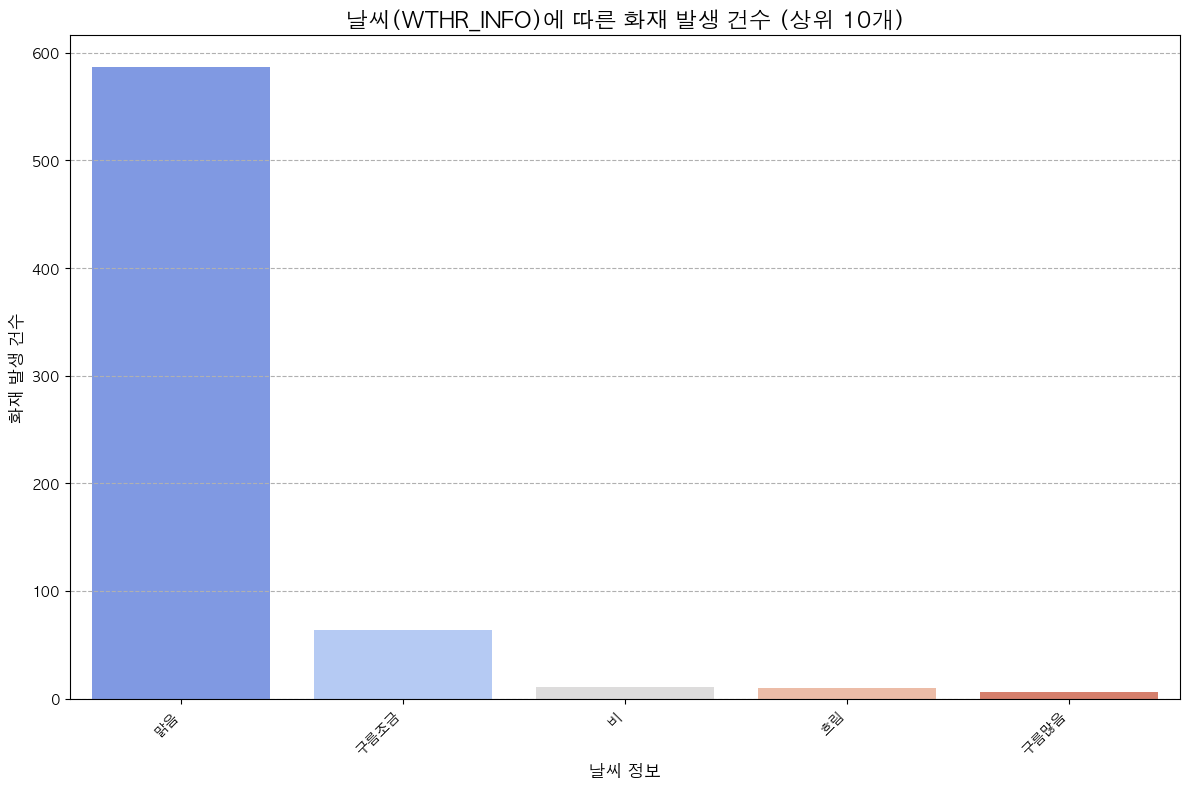

In [46]:
# 'WTHR_INFO' 컬럼의 데이터 정제
# 예를 들어 '맑음 '과 '맑음'은 같은 것으로 간주합니다.
df['WTHR_INFO'] = df['WTHR_INFO'].str.strip()

# 날씨 정보별 화재 발생 건수 집계
weather_counts = df['WTHR_INFO'].value_counts()

# 상위 10개 날씨 정보만 추출하여 시각화
top_10_weather = weather_counts.head(10)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_weather.index, y=top_10_weather.values, palette='coolwarm')
plt.title('날씨(WTHR_INFO)에 따른 화재 발생 건수 (상위 10개)', fontsize=16)
plt.xlabel('날씨 정보', fontsize=12)
plt.ylabel('화재 발생 건수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

/var/folders/mc/c2xlw1v55mvcpklv1sgzmldc0000gn/T/ipykernel_3546/1025839168.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='casualties', data=casualties_by_year, palette='viridis', ax=ax, label='총 사상자 (명)')


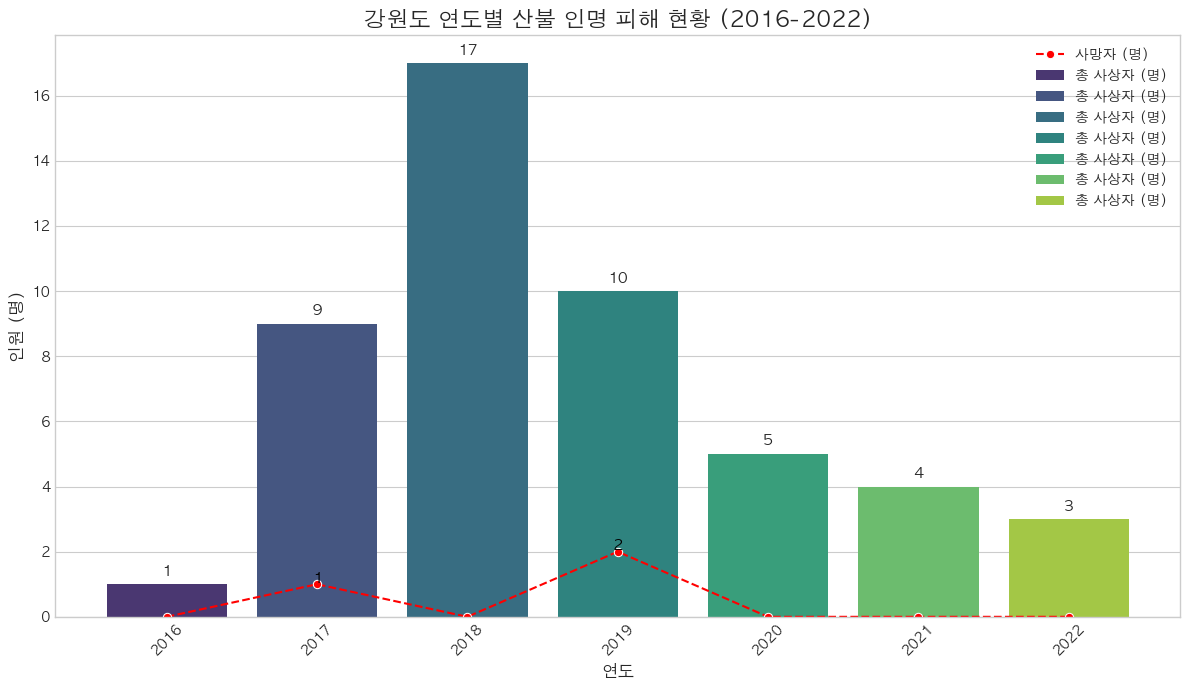

In [63]:
import matplotlib.pyplot as plt

# macOS 사용자용 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# '발생일자(OCRN_YMD)'에서 연도 추출
df['year'] = df['OCRN_YMD'].astype(str).str[:4]

# '사망자수(DCSD_CNT)'와 '부상자수(INJPSN_CNT)'를 합산하여 '총사상자' 컬럼 생성
df['casualties'] = df['DCSD_CNT'].fillna(0) + df['INJPSN_CNT'].fillna(0)
df['deaths'] = df['DCSD_CNT'].fillna(0)

# 3. 연도별 데이터 집계
# 연도별 총 사상자 수
casualties_by_year = df.groupby('year')['casualties'].sum().reset_index()
# 연도별 사망자 수
deaths_by_year = df.groupby('year')['deaths'].sum().reset_index()

# 4. 시각화 (막대그래프 + 선 그래프)
# 캔버스 및 축 객체 생성
fig, ax = plt.subplots(figsize=(12, 7))

# 막대그래프 (총 사상자 수)
sns.barplot(x='year', y='casualties', data=casualties_by_year, palette='viridis', ax=ax, label='총 사상자 (명)')

# 선 그래프 (사망자 수)
sns.lineplot(x='year', y='deaths', data=deaths_by_year, color='red', marker='o', linestyle='--', ax=ax, label='사망자 (명)')

# 각 막대 위에 총 사상자 수치 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=11)

# 선 그래프 위에 사망자 수치 표시
for index, row in deaths_by_year.iterrows():
    if row['deaths'] > 0: # 사망자가 0보다 클 때만 표시
        ax.text(index, row['deaths'] + 0.05, f"{row['deaths']:.0f}", color='black', ha="center", fontsize=11)


# 그래프 제목 및 레이블 설정
ax.set_title('강원도 연도별 산불 인명 피해 현황 (2016-2022)', fontsize=16)
ax.set_xlabel('연도', fontsize=12)
ax.set_ylabel('인원 (명)', fontsize=12)
ax.tick_params(axis='x', rotation=45)

# 범례 표시
ax.legend()

plt.tight_layout()
plt.show()


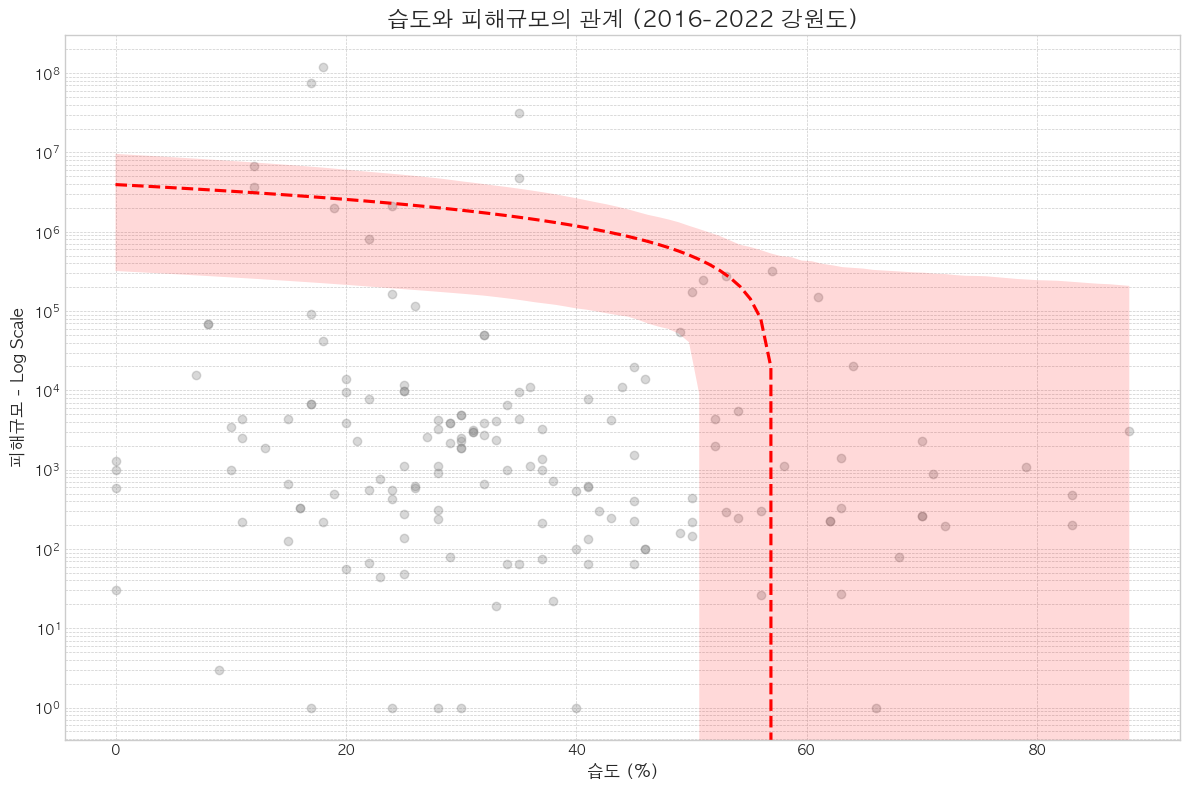


습도와 피해면적 간의 상관 계수: -0.1098


In [65]:
# 분석에 필요한 'HUM_VL'(습도)와 'PRPT_DAM_AMT'(피해면적) 컬럼 선택
df_analysis = df[['HUM_VL', 'PRPT_DAM_AMT']].copy()

# 데이터 타입을 숫자로 변환 (오류 발생 시 NaN으로 처리)
df_analysis['HUM_VL'] = pd.to_numeric(df_analysis['HUM_VL'], errors='coerce')
df_analysis['PRPT_DAM_AMT'] = pd.to_numeric(df_analysis['PRPT_DAM_AMT'], errors='coerce')

# 습도가 100을 초과하거나 피해면적이 0 미만인 비현실적인 데이터 제거
df_analysis = df_analysis[df_analysis['HUM_VL'] <= 100]
df_analysis = df_analysis[df_analysis['PRPT_DAM_AMT'] >= 0]

# 결측치 제거
df_analysis.dropna(subset=['HUM_VL', 'PRPT_DAM_AMT'], inplace=True)

# 피해면적이 0인 데이터는 관계 분석에서 제외 (산불이 발생했으나 피해면적이 없는 경우)
df_analysis = df_analysis[df_analysis['PRPT_DAM_AMT'] > 0]


# 4. 시각화
plt.figure(figsize=(12, 8))

# seaborn의 regplot을 사용하여 산점도와 회귀선을 함께 그림
# 피해면적(y축)은 분포가 매우 넓으므로 로그 스케일(log_scale)을 적용하여 패턴을 명확하게 확인
ax = sns.regplot(x='HUM_VL', y='PRPT_DAM_AMT', data=df_analysis,
                 scatter_kws={'alpha':0.3, 'color':'gray'},  # 점 투명도와 색상
                 line_kws={'color':'red', 'linestyle':'--'}) # 회귀선 색상과 스타일

ax.set_yscale('log') # Y축을 로그 스케일로 변경

plt.title('습도와 피해규모의 관계 (2016-2022 강원도)', fontsize=16)
plt.xlabel('습도 (%)', fontsize=12)
plt.ylabel('피해규모 - Log Scale', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# 5. 상관관계 분석
correlation = df_analysis['HUM_VL'].corr(df_analysis['PRPT_DAM_AMT'])
print(f"\n습도와 피해면적 간의 상관 계수: {correlation:.4f}")

/var/folders/mc/c2xlw1v55mvcpklv1sgzmldc0000gn/T/ipykernel_3546/1635073367.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IGTN_HTSRC_SCLSF_NM'].fillna('원인미상', inplace=True)


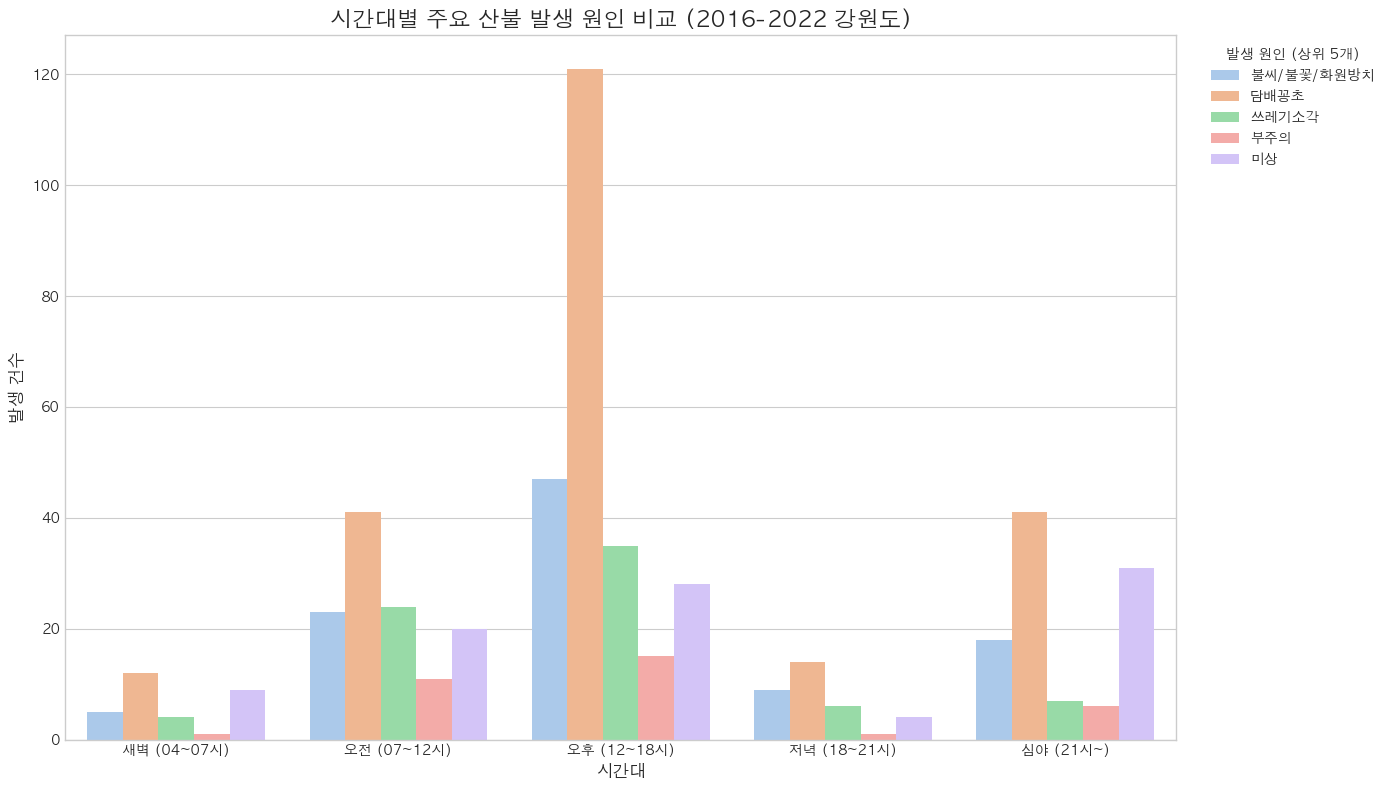

In [84]:
df = pd.read_csv('../data/강원도_2016-2022.csv', encoding='utf-8')

# 3. 데이터 전처리
# FIRE_OCRN_HR 컬럼에서 '시(hour)' 정보 추출 (6자리가 아닐 경우 0으로 채움)
df['hour'] = df['FIRE_OCRN_HR'].astype(str).str.zfill(6).str[:2]
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')
df.dropna(subset=['hour'], inplace=True)
df['hour'] = df['hour'].astype(int)

# 시간대 분류 함수 정의
def get_time_of_day(hour):
    if 4 <= hour < 7:
        return '새벽 (04~07시)'
    elif 7 <= hour < 12:
        return '오전 (07~12시)'
    elif 12 <= hour < 18:
        return '오후 (12~18시)'
    elif 18 <= hour < 21:
        return '저녁 (18~21시)'
    else: # 21시 이후 ~ 새벽 4시 이전
        return '심야 (21시~)'

# 'time_of_day' 컬럼 생성
df['time_of_day'] = df['hour'].apply(get_time_of_day)

# 발생 원인('IGTN_HTSRC_SCLSF_NM') 컬럼의 결측치를 '원인미상'으로 채움
df['IGTN_HTSRC_SCLSF_NM'].fillna('원인미상', inplace=True)


# 4. 데이터 분석 및 시각화
plt.figure(figsize=(14, 8))

# 상위 5개 주요 원인만 필터링 (그래프의 가독성을 위해)
top_causes = df['IGTN_HTSRC_SCLSF_NM'].value_counts().nlargest(5).index
df_top_causes = df[df['IGTN_HTSRC_SCLSF_NM'].isin(top_causes)]

# 시간대별, 원인별 발생 건수 시각화
sns.countplot(
    data=df_top_causes,
    x='time_of_day',
    hue='IGTN_HTSRC_SCLSF_NM',
    order=['새벽 (04~07시)', '오전 (07~12시)', '오후 (12~18시)', '저녁 (18~21시)', '심야 (21시~)'], # 시간대 순서 지정
    palette='pastel'
)

plt.title('시간대별 주요 산불 발생 원인 비교 (2016-2022 강원도)', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('발생 건수', fontsize=12)
plt.legend(title='발생 원인 (상위 5개)', bbox_to_anchor=(1.02, 1), loc='upper left') # 범례를 그래프 바깥에 표시
plt.tight_layout() # 레이아웃 최적화
plt.show()

In [9]:
!pip3 install nbformat

In [20]:
import pandas as pd
import altair as alt

# 데이터 불러오기
df = pd.read_csv('../data/강원도_2016-2022.csv', encoding='utf-8')

# 시(hour) 정보 추출
df['hour'] = (
    df['FIRE_OCRN_HR']
    .astype(str).str.zfill(6).str[:2]
    .pipe(pd.to_numeric, errors='coerce')
)
df = df.dropna(subset=['hour']).copy()
df['hour'] = df['hour'].astype(int)

# 시간대 분류
def get_time_of_day(hour):
    if 4 <= hour < 7:
        return '새벽 (04~07시)'
    elif 7 <= hour < 12:
        return '오전 (07~12시)'
    elif 12 <= hour < 18:
        return '오후 (12~18시)'
    elif 18 <= hour < 21:
        return '저녁 (18~21시)'
    else:
        return '심야 (21시~)'

df['time_of_day'] = df['hour'].apply(get_time_of_day)

# 결측치 처리
df['IGTN_HTSRC_SCLSF_NM'] = df['IGTN_HTSRC_SCLSF_NM'].fillna('원인미상')

# 상위 5개 원인만 선택
top_causes = df['IGTN_HTSRC_SCLSF_NM'].value_counts().nlargest(5).index
df_top = df[df['IGTN_HTSRC_SCLSF_NM'].isin(top_causes)].copy()

# 시간대 순서
time_order = ['새벽 (04~07시)', '오전 (07~12시)', '오후 (12~18시)', '저녁 (18~21시)', '심야 (21시~)']
df_top['time_of_day'] = pd.Categorical(df_top['time_of_day'], categories=time_order, ordered=True)

# Altair 시각화
chart = (
    alt.Chart(df_top)
    .mark_bar()
    .encode(
        x=alt.X('time_of_day:N', title='시간대', sort=time_order),
        y=alt.Y('count():Q', title='발생 건수'),
        color=alt.Color('IGTN_HTSRC_SCLSF_NM:N', title='발생 원인'),
        tooltip=['time_of_day', 'IGTN_HTSRC_SCLSF_NM', alt.Tooltip('count()', title='발생 건수')]
    )
    .properties(
        title='시간대별 주요 산불 발생 원인 비교 (2016-2022 강원도)',
        width=700,
        height=400
    )
)

chart.interactive()  # 줌, 팬, 툴팁 가능

alt.Chart(...)